<h1 color='Green'>EDA</h1>

In [1]:
#preprocessing stage
#own libs
import sys 
sys.path.append('../src')
from db_connection import conn
#public libs
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Load the dataset until sql
q = 'SELECT * FROM criminal_mind_raw' #Query to load all columns from the raw data table
df_raw = pd.read_sql(sql=q, con=conn.engine) #Use pd to load the data in python

In [3]:
df_raw.head(5) #Show the first 5 rows

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,None,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,None,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,None,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,None,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,None,34.0944,-118.3277


In [4]:
df_raw.shape #Show the Number of records

(982638, 28)

In [5]:
columns = list(df_raw.keys()) #save the columns names as a list
print(columns) #show this list

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           982638 non-null  int64  
 1   Date Rptd       982638 non-null  object 
 2   DATE OCC        982638 non-null  object 
 3   TIME OCC        982638 non-null  int64  
 4   AREA            982638 non-null  int64  
 5   AREA NAME       982638 non-null  object 
 6   Rpt Dist No     982638 non-null  int64  
 7   Part 1-2        982638 non-null  int64  
 8   Crm Cd          982638 non-null  int64  
 9   Crm Cd Desc     982638 non-null  object 
 10  Mocodes         837376 non-null  object 
 11  Vict Age        982638 non-null  int64  
 12  Vict Sex        844193 non-null  object 
 13  Vict Descent    844182 non-null  object 
 14  Premis Cd       982624 non-null  float64
 15  Premis Desc     982053 non-null  object 
 16  Weapon Used Cd  326167 non-null  float64
 17  Weapon Des

In [7]:
df_raw.shape

(982638, 28)

In [8]:
df_raw["DR_NO"].duplicated().value_counts()

DR_NO
False    982638
Name: count, dtype: int64

In [9]:
df_raw["DR_NO"].sort_values().tail()

886497    249904551
948845    249913791
906447    249917269
938460    249918669
883286    249925282
Name: DR_NO, dtype: int64

In [10]:
weapon_list = list(df_raw[df_raw['Weapon Desc'].notna()]['Weapon Desc'].unique()) #Save the exist weapons in the dataset on a list
print(weapon_list)#show this list
print('Total Weapons: ',len(weapon_list))

['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'VEHICLE', 'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT', 'BELT FLAILING INSTRUMENT/CHAIN', 'HAND GUN', 'UNKNOWN FIREARM', 'KNIFE WITH BLADE 6INCHES OR LESS', 'FIXED OBJECT', 'KITCHEN KNIFE', 'MACHETE', 'UNKNOWN TYPE CUTTING INSTRUMENT', 'MACE/PEPPER SPRAY', 'STICK', 'OTHER KNIFE', 'PHYSICAL PRESENCE', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'HAMMER', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'SEMI-AUTOMATIC PISTOL', 'SIMULATED GUN', 'RAZOR', 'OTHER FIREARM', 'FOLDING KNIFE', 'PIPE/METAL PIPE', 'ROCK/THROWN OBJECT', 'RIFLE', 'OTHER CUTTING INSTRUMENT', 'FIRE', 'REVOLVER', 'BOTTLE', 'SCISSORS', 'SWITCH BLADE', 'BRASS KNUCKLES', 'CLUB/BAT', 'BLUNT INSTRUMENT', 'BOARD', 'STUN GUN', 'CLEAVER', 'RAZOR BLADE', 'SCREWDRIVER', 'SHOTGUN', 'CONCRETE BLOCK/BRICK', 'CAUSTIC CHEMICAL/POISON', 'SEMI-AUTOMATIC RIFLE', 'SCALDING LIQUID', 'TIRE IRON', 'BOWIE KNIFE', 'GLASS', 'AXE', 'TOY GUN', 'BOMB THREAT', 'SAWED OFF RIFLE/SHOTGUN', 'MARTIAL ARTS WEAPO

In [11]:
df_raw.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.826380e+05,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982624.000000,326167.000000,982627.000000,68875.000000,2311.000000,64.00000,982638.000000,982638.000000
mean,2.197437e+08,1338.945426,10.700277,1116.459887,1.404253,500.823555,29.079817,306.133008,363.840882,500.578668,958.167085,984.204673,991.21875,33.995725,-118.082225
std,1.294954e+07,651.537830,6.107808,610.893787,0.490747,206.211940,21.970094,219.053795,123.684663,206.010361,110.232109,51.485644,27.06985,1.636729,5.672940
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106089e+08,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208146e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.309153e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


We see in the Min value of Vict Age is a negative value thats incorrect 

In [12]:
#Drop the negative age records
df_raw = df_raw[df_raw['Vict Age']>=0]

In [13]:
df_raw.shape

(982507, 28)

---

Now we look for the statistics about the categorical values

In [14]:
df_raw.describe(include='object') #show some statistics about categorical variables

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street
count,982507,982507,982507,982507,837249,844062,844051,981922,326156,982506,982507,982507,151840
unique,1735,1735,21,140,309350,5,20,306,79,6,6,66263,10326
top,02/02/2023 12:00:00 AM,01/01/2020 12:00:00 AM,Central,VEHICLE - STOLEN,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST,BROADWAY
freq,929,1150,67760,110803,40817,396744,292422,253578,174410,784851,784851,2522,2467


In [15]:
df_raw['Status'].unique()#Show all the differents records in the status column

array(['AA', 'IC', 'AO', 'JA', 'JO', 'CC', None], dtype=object)

In [16]:
df_raw['Status Desc'].unique()#Show all the differents records in the Status Desc column

array(['Adult Arrest', 'Invest Cont', 'Adult Other', 'Juv Arrest',
       'Juv Other', 'UNK'], dtype=object)

In [17]:
df_raw[df_raw['Status'].isna()][['Status', 'Status Desc']]#We saw when the status is null the description is UNK

,Status,Status Desc
880911,None,UNK


In [18]:
df_raw[df_raw['Status'] == 'CC'][['Status', 'Status Desc']]#We saw when the status is CC the description is UNK too

,Status,Status Desc
487786,CC,UNK
606926,CC,UNK
725108,CC,UNK
817485,CC,UNK
849492,CC,UNK
923956,CC,UNK


#### UNK is the status desc of nulls and CC

In [19]:
df_raw['Vict Sex'].unique() #We see all the posible values into the Vict Sex Column

array(['M', 'X', 'F', None, 'H', '-'], dtype=object)

---

Looking in Vict Information


In [20]:
df_raw[(df_raw['Vict Sex']=='H') | (df_raw['Vict Sex']=='-') | (df_raw['Vict Sex']=='X')][['AREA NAME', 'Status Desc', 'Vict Sex']]

,AREA NAME,Status Desc,Vict Sex
2,Southwest,Invest Cont,X
60,Central,Invest Cont,X
156,Harbor,Invest Cont,X
171,Southwest,Invest Cont,X
189,Northeast,Invest Cont,X
...,...,...,...
982582,West LA,Invest Cont,X
982588,Harbor,Invest Cont,X
982600,N Hollywood,Adult Arrest,X
982602,Van Nuys,Invest Cont,X


	
Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

In [21]:
df_raw[df_raw['Vict Sex'] == '-'][['AREA NAME', 'Status Desc', 'Vict Sex', 'Vict Descent']]

,AREA NAME,Status Desc,Vict Sex,Vict Descent
807424,Olympic,Invest Cont,-,-


In [22]:
df_raw[df_raw['Vict Sex'] == 'H'][['AREA NAME', 'Status Desc', 'Vict Sex', 'Vict Descent']]

,AREA NAME,Status Desc,Vict Sex,Vict Descent
17626,Wilshire,Invest Cont,H,H
21744,Wilshire,Invest Cont,H,F
30529,Olympic,Adult Other,H,H
38072,Rampart,Invest Cont,H,F
57071,Newton,Invest Cont,H,F
...,...,...,...,...
969721,Northeast,Invest Cont,H,F
971932,Olympic,Invest Cont,H,F
975039,Southwest,Invest Cont,H,X
975352,Central,Invest Cont,H,F


In [23]:
df_raw[df_raw['Vict Sex'] == 'H'][['AREA NAME', 'Status Desc', 'Vict Sex', 'Vict Descent']].describe(include='object')

,AREA NAME,Status Desc,Vict Sex,Vict Descent
count,112,112,112,112
unique,19,3,1,8
top,Newton,Invest Cont,H,F
freq,19,99,112,55


In [24]:
df_raw['Cross Street'].info() #We saw that this column have near 90% of the records in null

<class 'pandas.core.series.Series'>
Index: 982507 entries, 0 to 982637
Series name: Cross Street
Non-Null Count   Dtype 
--------------   ----- 
151840 non-null  object
dtypes: object(1)
memory usage: 15.0+ MB


In [25]:
df_raw.drop(columns=['Cross Street'], inplace=True)
df_raw.keys()

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [26]:
df_raw['Mocodes']

0                                  None
1                        1822 1402 0344
2                             0344 1251
3                             0325 1501
4                   1822 1501 0930 2004
                      ...              
982633                        0344 1822
982634                             None
982635                   0329 0400 0416
982636    1822 0334 0416 0445 0449 1202
982637                             None
Name: Mocodes, Length: 982507, dtype: object

In [27]:
df_raw["Crm Cd"].unique()

array([510, 330, 480, 343, 354, 624, 821, 812, 230, 956, 341, 930, 668,
       420, 813, 440, 626, 762, 441, 310, 331, 210, 662, 860, 236, 820,
       661, 810, 901, 442, 740, 761, 649, 845, 121, 745, 946, 627, 653,
       928, 815, 940, 625, 352, 648, 886, 666, 921, 805, 932, 900, 903,
       439, 954, 434, 235, 220, 654, 922, 760, 850, 237, 763, 345, 888,
       320, 122, 753, 822, 350, 520, 806, 906, 437, 410, 623, 522, 450,
       890, 755, 231, 664, 251, 951, 920, 250, 470, 902, 647, 651, 910,
       110, 351, 421, 444, 670, 814, 756, 433, 931, 435, 438, 443, 660,
       950, 622, 943, 487, 949, 933, 865, 474, 652, 113, 446, 475, 471,
       451, 436, 485, 944, 349, 942, 347, 353, 870, 473, 880, 452, 924,
       840, 948, 884, 904, 830, 432, 882, 445, 926, 453])

In [28]:
df_raw["Crm Cd 1"].unique()

array([510., 330., 480., 343., 354., 624., 812., 230., 956., 341., 930.,
       668., 420., 813., 440., 626., 762., 441., 310., 331., 210., 662.,
       860., 236., 661., 810., 901., 442., 740., 761., 649., 845., 121.,
       745., 946., 627., 653., 821., 928., 815., 940., 625., 352., 648.,
       886., 666., 921., 805., 932., 900., 820., 903., 439., 760., 954.,
       434., 235., 220., 654., 922., 850., 237., 763., 345., 888., 320.,
       122., 753., 822., 350., 520., 806., 906., 437., 410., 623., 522.,
       450., 890., 755., 231., 664., 251., 951., 920., 250., 470., 902.,
       647., 651., 910., 110., 351., 421., 444., 670., 814., 756., 433.,
       931., 435., 438., 443., 660., 950., 622., 943., 487.,  nan, 949.,
       933., 865., 474., 652., 113., 446., 475., 471., 451., 436., 521.,
       485., 944., 349., 942., 347., 353., 430., 870., 473., 880., 452.,
       924., 840., 948., 884., 904., 830., 432., 882., 445., 926., 453.])

In [29]:
df_raw.to_csv('../Data/clean_data.csv', index=False)

In [30]:
df_raw.to_sql(name="criminal_mind_clean", index=False, if_exists="replace")

TypeError: NDFrame.to_sql() missing 1 required positional argument: 'con'

### <center color='red'>Start Analisis</center>

In [85]:
df_raw['Vict Sex'].value_counts() #We see the count of each category in the Vict Sex Column

Vict Sex
M    396744
F    352738
X     94467
H       112
-         1
Name: count, dtype: int64

In [86]:
df_raw['Vict Descent'].value_counts() #We see the count of each category in the Vict Descent Column

Vict Descent
H    292422
W    197106
B    134181
X    103234
O     76705
A     21027
K      5678
F      4555
C      4265
J      1490
V      1117
I       968
Z       529
P       277
U       211
D        86
G        72
L        71
S        55
-         2
Name: count, dtype: int64

In [87]:
women_victims = df_raw[df_raw['Vict Sex'] == 'F']

In [88]:
men_victims = df_raw[df_raw['Vict Sex']=='M']

In [89]:
women_victims.describe(include='object')

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION
count,352738,352738,352738,352738,349528,352738,352732,352687,148959,352738,352738,352738
unique,1735,1735,21,133,146125,1,19,294,76,6,6,49692
top,02/02/2023 12:00:00 AM,12/02/2022 12:00:00 AM,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,0344,F,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST
freq,477,640,26580,35493,15020,352738,146832,92099,99233,258059,258059,497


In [90]:
men_victims.describe(include='object')

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION
count,396744,396744,396744,396744,393686,396744,396737,396480,157846,396744,396744,396744
unique,1735,1735,21,135,158695,1,20,303,78,6,6,53278
top,06/21/2022 12:00:00 AM,01/01/2020 12:00:00 AM,Central,BATTERY - SIMPLE ASSAULT,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST
freq,364,453,32853,39146,21263,396744,145370,81814,68983,317070,317070,1140


In [91]:
women_victims.shape

(352738, 27)

In [92]:
men_victims.shape

(396744, 27)

In [93]:
# Top 5 Weapons used in crimens at the women
sizes = women_victims[~women_victims['Weapon Desc'].isna()]['Weapon Desc'].value_counts()[:6]
women_victims[~women_victims['Weapon Desc'].isna()]['Weapon Desc'].value_counts()


Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    99233
UNKNOWN WEAPON/OTHER WEAPON                       13509
VERBAL THREAT                                     11485
HAND GUN                                           4651
KNIFE WITH BLADE 6INCHES OR LESS                   1718
                                                  ...  
RELIC FIREARM                                         2
ANTIQUE FIREARM                                       2
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                   1
UZI SEMIAUTOMATIC ASSAULT RIFLE                       1
MARTIAL ARTS WEAPONS                                  1
Name: count, Length: 76, dtype: int64

In [94]:
sizes

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    99233
UNKNOWN WEAPON/OTHER WEAPON                       13509
VERBAL THREAT                                     11485
HAND GUN                                           4651
KNIFE WITH BLADE 6INCHES OR LESS                   1718
UNKNOWN FIREARM                                    1601
Name: count, dtype: int64

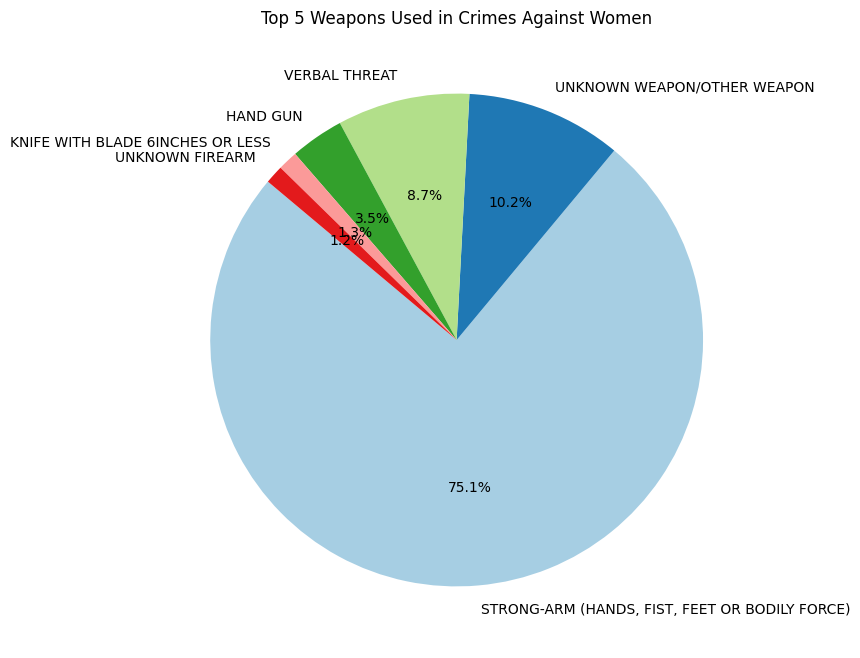

In [95]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=sizes.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Weapons Used in Crimes Against Women')
plt.show()

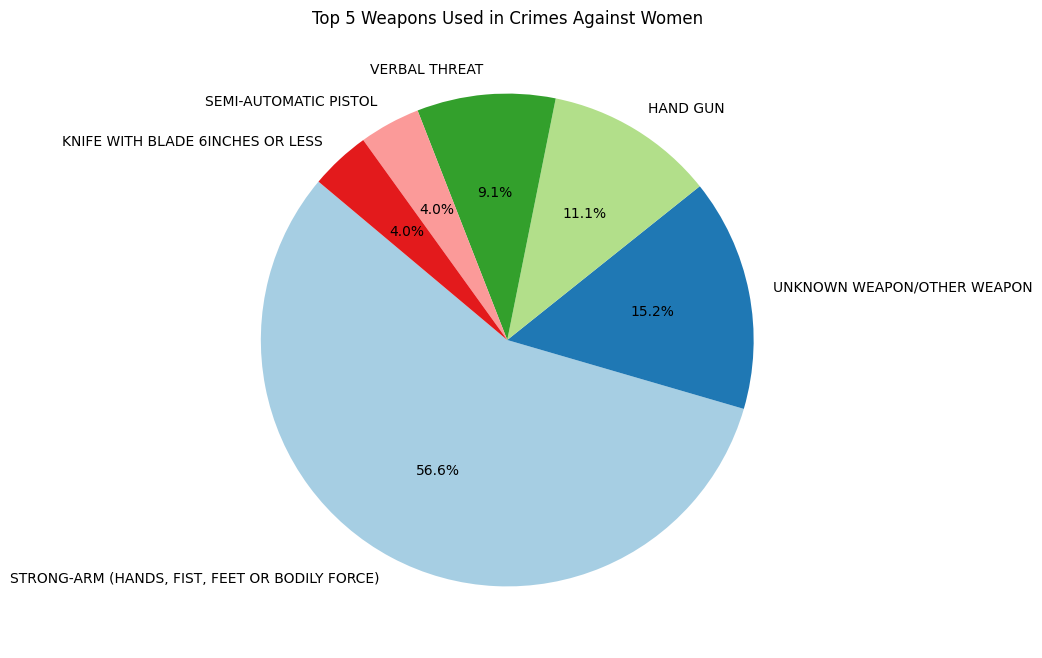

In [96]:
# Top 5 Weapons used in crimens at the men
sizes = men_victims[~men_victims['Weapon Desc'].isna()]['Weapon Desc'].value_counts()[:6]
men_victims[~men_victims['Weapon Desc'].isna()]['Weapon Desc'].value_counts()
 
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=sizes.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Weapons Used in Crimes Against Women')
plt.show()

In [97]:
#Women Victims with UNKNOWN WEAPON/OHTR ATTACK
women_victims[women_victims['Weapon Desc']=='UNKNOWN WEAPON/OTHER WEAPON'][['AREA NAME', 'Crm Cd Desc', 'Weapon Desc']]

,AREA NAME,Crm Cd Desc,Weapon Desc
25,Northeast,CRIMINAL THREATS - NO WEAPON DISPLAYED,UNKNOWN WEAPON/OTHER WEAPON
149,West Valley,BRANDISH WEAPON,UNKNOWN WEAPON/OTHER WEAPON
303,Hollywood,BURGLARY,UNKNOWN WEAPON/OTHER WEAPON
471,Foothill,ORAL COPULATION,UNKNOWN WEAPON/OTHER WEAPON
704,Central,INTIMATE PARTNER - AGGRAVATED ASSAULT,UNKNOWN WEAPON/OTHER WEAPON
...,...,...,...
982225,77th Street,BURGLARY,UNKNOWN WEAPON/OTHER WEAPON
982230,Pacific,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",UNKNOWN WEAPON/OTHER WEAPON
982397,West LA,BURGLARY,UNKNOWN WEAPON/OTHER WEAPON
982508,Southeast,BRANDISH WEAPON,UNKNOWN WEAPON/OTHER WEAPON


In [98]:
#Top Area Tipe of Attack with UNKNOW WEAPON at Women
women_victims[women_victims['Weapon Desc']=='UNKNOWN WEAPON/OTHER WEAPON'][['AREA NAME', 'Crm Cd Desc', 'Weapon Desc']].describe(include='object')

,AREA NAME,Crm Cd Desc,Weapon Desc
count,13509,13509,13509
unique,21,81,1
top,Pacific,BATTERY - SIMPLE ASSAULT,UNKNOWN WEAPON/OTHER WEAPON
freq,1676,2767,13509


In [99]:
women_victims[women_victims['Crm Cd Desc']=='ORAL COPULATION'][['AREA NAME', 'Vict Age', 'Vict Descent', 'Status Desc']].describe()

,Vict Age
count,530.000000
mean,26.464151
std,15.622909
min,0.000000
25%,14.000000
50%,24.000000
75%,35.000000
max,82.000000


The average age of women who were ORAL COPULATION is 26 years old

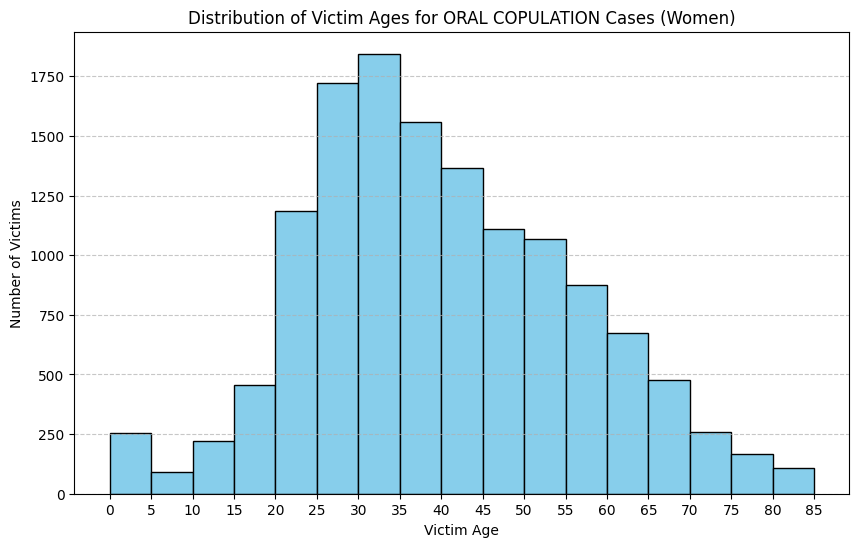

In [100]:
victim_ages = women_victims[women_victims['Weapon Desc']=='UNKNOWN WEAPON/OTHER WEAPON']['Vict Age']
plt.figure(figsize=(10, 6))
plt.hist(victim_ages, bins=range(0, 90, 5), color='skyblue', edgecolor='black')

plt.title('Distribution of Victim Ages for ORAL COPULATION Cases (Women)')
plt.xlabel('Victim Age')
plt.ylabel('Number of Victims')
plt.xticks(range(0, 90, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

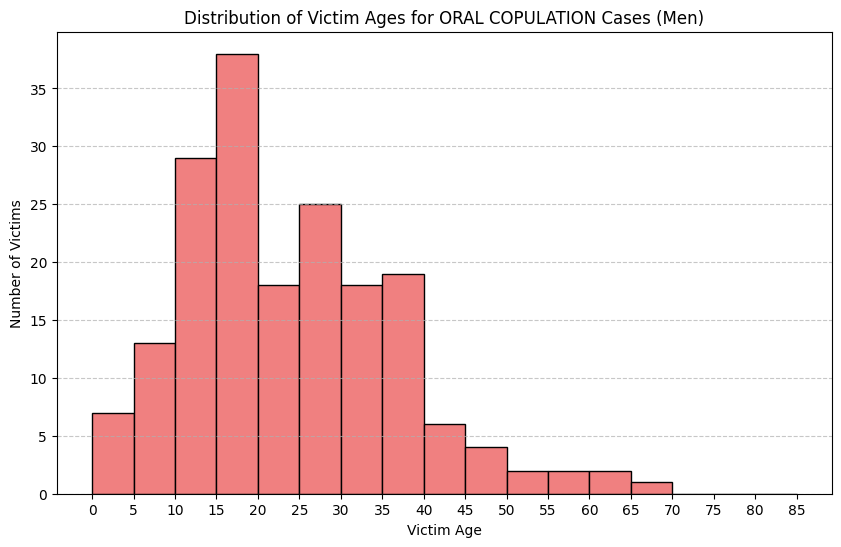

In [101]:
victim_ages_men = men_victims[men_victims['Crm Cd Desc']=='ORAL COPULATION']['Vict Age']
plt.figure(figsize=(10, 6))
plt.hist(victim_ages_men, bins=range(0, 90, 5), color='lightcoral', edgecolor='black')

plt.title('Distribution of Victim Ages for ORAL COPULATION Cases (Men)')
plt.xlabel('Victim Age')
plt.ylabel('Number of Victims')
plt.xticks(range(0, 90, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


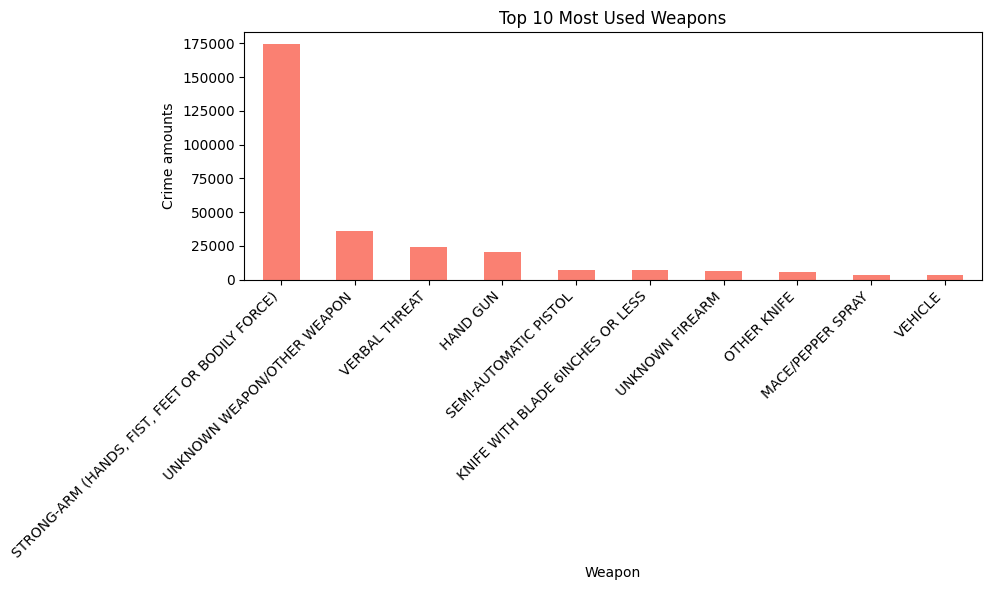

In [102]:
# Count the most used weapons
weapon_usage = df_raw['Weapon Desc'].value_counts().head(10)

# Most Used Weapons Graph
plt.figure(figsize=(10, 6))
weapon_usage.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Used Weapons')
plt.xlabel('Weapon')
plt.ylabel('Crime amounts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

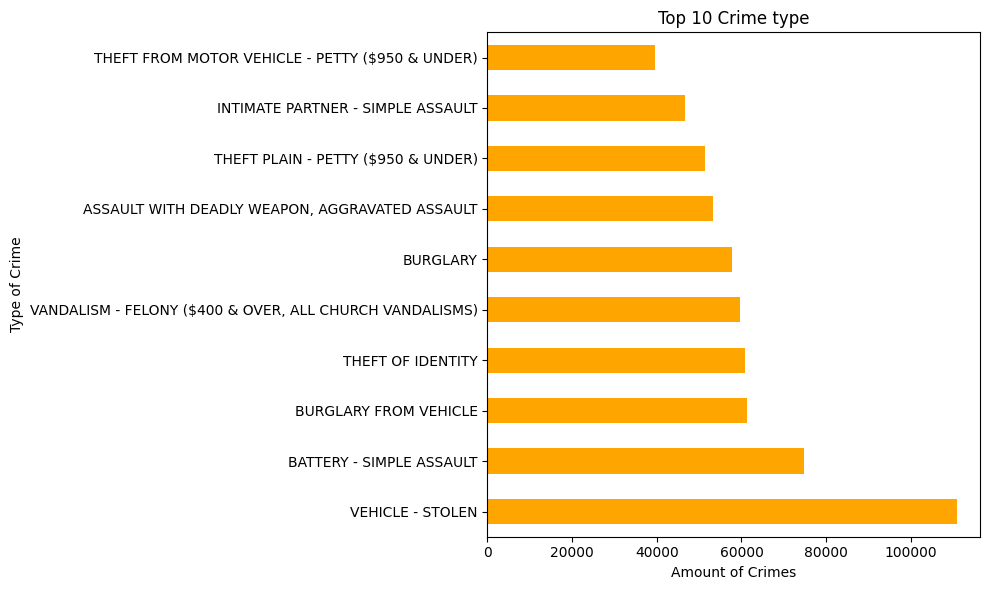

In [103]:
# Contar el número de crímenes por tipo
crime_types = df_raw['Crm Cd Desc'].value_counts().head(10)

# Graficar la distribución de los crímenes por tipo
plt.figure(figsize=(10, 6))
crime_types.plot(kind='barh', color='orange')
plt.title('Top 10 Crime type')
plt.xlabel('Amount of Crimes')
plt.ylabel('Type of Crime')
plt.tight_layout()
plt.show()